In [1]:
import pandas as pd
import numpy as np
import math
from collections import defaultdict
import ts_code.nsfg as nsfg
import ts_code.thinkstats2 as thinkstats2
import ts_code.thinkplot as thinkplot
import matplotlib.pyplot as plt
%matplotlib inline

## Chapter 06 - Probability density functions

The derivative of a CDF is called a **probability density function** of PDF.

The PDF of an exponential dsitribution is;

$$PDF_{\text{expo}}(x) = \lambda e^{-\lambda x}$$

The PDF of the normal dsitribution is; 

$$PDF_{\text{normal}}(x) = \frac{1}{\sigma \sqrt{2\pi}} \cdot \exp[-\frac{1}{2}(\frac{x-\mu}{\sigma})^{2}]$$

Evaluating a PDF for a specific $x$ is not useful because it does not return a probability, it returns a *probability density*.

The **probability density** measure the probability per unit of x, in order to get a probability mass (the probability) you have to integrate over $x$.

**Kernel  density  estimation** (KDE) is an algorithm that takes a sample and find an appropriately smooth PDF that fits the data. The KDE for a sample drawn from some distribution with an unknown density $f$ is;

$$KDE = \frac{1}{nh} \sum_{i=1}^{n} K(\frac{x-x_{i}}{h})$$

where $K$ is the *kernel*, a non-negative function that integrates to 1, and $h>0$ is a smoothing parameter called the *bandwith*. 

A range of kernel functions are commonly used: uniform, triangular, biweight, triweight, Epanechnikov, normal, and others. 

The Epanechnikov kernel is optimal in a mean square error sense, though the loss of efficiency is small for the kernels listed previously,and due to its convenient mathematical properties, the normal kernel is often used, which means $K(x) = ϕ(x)$, where $ϕ$ is the standard normal density function.

Extimating a density function with KDE is useful for several purposes;

+ **Visualization:** During the exploration phase of a projects, CDFs are usually the best visualization of a distribution. After looking at a CDF, you can decide if an estimated PDF is an appropriate model of the distribution. If so, it can be a better choise for presenting.

+ **Interpolation:**  An estimated PDF is a way to get from a sample to a model of the population. If you have reason to believe that population distributes smooth, you can use KDE to interpolate the density for values that don't appear in the sample.

+ **Simulation:** Simulations are often based on the dstribution of a sample. If the sample size is small, it might be apprpriate to smooth the sample distribution using KDE.

### The distribution framework

So far we've seen PMFs, CDFs, and PDFs.

PMFs represent the probabilities for a discrete set of values. To get from a PMF to a CDF we add up the probability masses to get cumulative probabilities. To go back, we compute the differences in cumulative probabilities. 

A PDF is the derivative of a continuous CDF, or you can say a CDF is the integral of a PDF. 

To go from a discrete to continuous distribution you can perform various kinds of smoothing. One way is to assume that the data come from an analytic continuous distribution and estimate the parameter of the dsitribution. Another option is kernel density estimation (KDE).

The opposite of smoothing is **discretizing** or *quantizing*. If you evaluate a PDF at discrete points, you generate a PMF. You can get better approximation using numerical integration.

### Moments

A **raw moment** is a kind of statistics. If you have a sample of $n$, values, $x_{i}$, the $k\text{th}$ raw moment is;

$$m'_{k} = \frac{1}{n}\sum_{i} x_{i}^{k}$$

When $k=1$ the result is the sample mean $\bar{x}$. Other raw moments don't mean much by themselves, but are used in some computations.

The **central moments** are more useful. The $k\text{th}$ central moment is:

$$m_{k} = \frac{1}{n}\sum_{i} (x_{i} - \bar{x})^{k}$$

When $k=2$, the result is the second central moment, which is the variance.

The definition of variance gives a hint about why these statistics are called moments. If we attach a weight along a ruler at each  location, $x_{i}$, and then spin the ruler around the mean, the moment of inertia (the torque needed for a desired angular acceleration about a rotational axis) of the spinning weights is the variance of the values.

When reporting moment-based statistics, it is important to think about units.

If our $x_{i}$ values are in cm, the first raw moment is also in cm, but the second is in cm<sup>2</sup> and then third in cm<sup>3</sup> and so on.

**Skewness** is a property that describes the shape of a distribution. If it is symmetric around its central tendency, it is **unskewed**. If the tail of the values extend further to the right, its **right skewed**, if they extend left, its **left skewed**.

Given a sequence of values, $x_{i}$, the **sample skewness**, $g_{1}$, is;

$$g_{1} = \frac{\frac{1}{n}\sum_{i} (x_{i} - \bar{x})^{3}}{\sigma}$$

$g_{1}$ is the third **standardized moment**, which is a central moment that has been normalized, so it has no units.

*Negative* skewness indicates that a distribution skews *left*; *positive* skenwess indicates that a distribution skews *right*. THe magnitude of $g_{1}$ indicates the strength, but by itself is not easy to interpert.

In practice computing this sample skewness is not a good idea, outliear have a disproportionate effect on $g_{1}$.

Another way to evaluate the asymmetry of a distribution is to look at the relationship between the mean and median.  Extreme values have more effect on the mean than the median, so in a distribution that *skews left*, the mean is *less than* the median. In a distribution that *skews right*, the *mean is greater*.

**Pearson's median skewness coeffcient** is a measure of skewness based on the difference between the sample mean and median:

$$g_{p} = \frac{3(\bar{x}-m)}{S}$$

where $\bar{x}$ is the sample mean, $m$ is the median, and $S$ is the standard deviation.

This is a **robust** statistic, which means it is less vulnerable to the effect of outliers.

### Exercises

**Exercise 6.1** The distribution of income is famously skewed to the right. In this exercise, we'll measure how strong that skew is. The Current Population Survey (CPS) is a joint effort of the Bureau of Labor Statistics and  the Census Bureau to study income and related variables. The dataset is in the form of a series of income ranges and the number of respondents who fell in each range. The lowest range includes respondents who reported annual household income "Under \$5000." The highest range includes respondents who made "\$250,000 or more."

To estimate mean and other statistics from these data, we have to make some assumptions about the lower and upper bounds, and how the values are distributed in each range. *hinc2.py* provides *InterpolateSample*, which shows one way to model this data. It takes a DataFrame with a column, income, that contains the upper bound of each range, and freq, which contains the number of respondents in each frame. 

It also takes *log_upper*, which is an assumed upper bound on the highest range, expressed in log10dollars. The default value, log_upper=6.0 represents the assumption that the largest income among the respondents is 10<sup>6</sup>, or one million dollars.
    
InterpolateSample generates a pseudo-sample; that is, a sample of house-hold incomes that yields the same number of respondents in each range as the actual data. It assumes that incomes in each range are equally spaced on a log10 scale.

Compute the median, mean, skewness and Pearson's skewness of the resulting sample. What fraction of households reports a taxable income below the mean? How do the results depend on the assumed upper bound?

In [2]:
import ts_code.hinc2 as hinc2

/home/scott/ds/thinkStats/ts_code/hinc2.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.log_lower[0] = 3.0
/home/scott/ds/thinkStats/ts_code/hinc2.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.log_upper[41] = log_upper


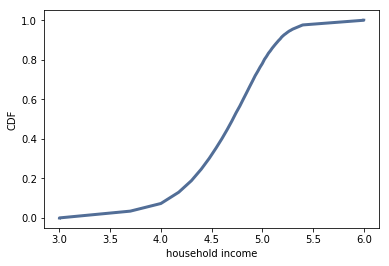

In [4]:
hinc2.main()

In [12]:
df = hinc2.hinc.ReadData()

In [21]:
one_mill = hinc2.InterpolateSample(df)

/home/scott/ds/thinkStats/ts_code/hinc2.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.log_lower[0] = 3.0
/home/scott/ds/thinkStats/ts_code/hinc2.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.log_upper[41] = log_upper


In [61]:
incomes = {'1 million':6,"10 million":9, '50 million':7.69897, '100 million': 8, '500 million': 8.69897,
           '1 billion':9, '10 billion':10, '50 billion': 10.69897, '90 billion':10.954242509}
data_dict = {}

for key, val in incomes.items():
    values = hinc2.InterpolateSample(df, val)
    cdf = thinkstats2.Cdf(values)
    mean = values.mean()
    median = np.median(values)
    var = sum((x - mean)**2 for x in values) / len(values)
    std = math.sqrt(var)
    skew = (sum((x - mean)**3 for x in values) / len(values)) / std
    pearsons = 3 * (mean - median)/std
    percent_below_mean = cdf.PercentileRank(mean)
    data_dict[key] = [mean, std, skew, pearsons, percent_below_mean]

/home/scott/ds/thinkStats/ts_code/hinc2.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.log_lower[0] = 3.0
/home/scott/ds/thinkStats/ts_code/hinc2.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.log_upper[41] = log_upper


In [66]:
print ("{:<12}{:<2}{:<5}{:<2}{:<19}{:<2}{:<11}{:<2}{:<13}{:<2}{:<10}".format('Income','|', 'Mean','|', 'Standard Deviation','|', 
                                                                            'Sample Skew','|', 'Pearson Skew','|', 
                                                                            'Percent of Income Earners Below Mean'))

for k, v in data_dict.items():
    mean, std, skew, pearsons, percent_below_mean = v
    print ("{:<12}{:<2}{:<5.2f}{:<2}{:<19.2f}{:<2}{:<11.2f}{:<2}{:<13.2f}{:<2}{:<10.2f}".format(k,'|', mean,'|', std,'|', 
                                                                            skew,'|', pearsons,'|', 
                                                                            percent_below_mean))

Income      | Mean | Standard Deviation | Sample Skew| Pearson Skew | Percent of Income Earners Below Mean
1 million   | 4.66 | 0.46               | -0.14      | -0.34        | 45.06     
10 million  | 4.69 | 0.60               | 0.76       | -0.08        | 48.40     
50 million  | 4.68 | 0.53               | 0.21       | -0.18        | 46.95     
100 million | 4.68 | 0.55               | 0.31       | -0.15        | 47.29     
500 million | 4.69 | 0.59               | 0.61       | -0.10        | 48.07     
1 billion   | 4.69 | 0.60               | 0.76       | -0.08        | 48.40     
10 billion  | 4.71 | 0.67               | 1.34       | -0.02        | 49.56     
50 billion  | 4.71 | 0.72               | 1.84       | 0.02         | 50.40     
90 billion  | 4.72 | 0.73               | 2.04       | 0.03         | 50.70     


> As we increase the upper bound, the distribution moves to being heavily right skewed. This result in more and more people (as a percent) earning less than the mean. 

### Glossary

**Probability  density  function  (PDF):**  The  derivative  of  a  continuous CDF, a function that maps a value to its probability density.

**Probability  density:** A quantity that can be integrated over a range of values to yield a probability. If the  values are in units of cm, for example, probability density is in units of probability per cm.

**Kernel density estimation (KDE):** An algorithm that estimates a PDF based on a sample.

**discretize:** To approximate a continuous function or distribution witha discrete function. The opposite of smoothing.

**raw moment:** A statistic based on the sum of data raised to a power.

**central moment:** A statistic based on deviation from the mean, raised to a power.

**standardized moment:** A ratio of moments that has no units.

**skewness:**  A measure of how asymmetric a distribution is.

**sample skewness:** A moment-based statistic intended to quantify theskewness of a distribution.

**Pearson's median skewness coefficient:** A statistic intended to quantify the skewness of a distribution based on the median, mean, and standard deviation.

**robust:** A statistic is robust if it is relatively immune to the effect ofoutliers.